# **Read & Clean the data**

In [70]:
rawData = open("SMSSpamCollection.tsv", encoding="utf8").read()

In [71]:
# Get a glimpse 
rawData[0:400]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, "

In [72]:
parsedData = rawData.replace('\t', '\n').split('\n')
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [73]:
# Get the labels 
labelList = parsedData[0::2]
textList = parsedData[1::2]

print(labelList[0:10])
print(textList[2])

['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam']
Nah I don't think he goes to usf, he lives around here though


In [74]:
# Small issue with lengths
print(labelList[-5:])


['ham', 'ham', 'ham', 'ham', '']


In [75]:
# Reading the easy way

import pandas as pd 

pd.set_option('display.max_colwidth', 150)

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [76]:
# Pre - Remove punct
import string 

def remove_punct(s):
    return s.translate(str.maketrans("", "", string.punctuation))

In [77]:
# Pre - Tokenize
import re 

def tokenize(s):
    return re.split('\W+', s)

In [78]:
# Pre - Remove stop words 
import nltk 
stopWords = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    return [word for word in tokenized_list if word not in stopWords]


In [79]:
# Pre - Stemming 

# Porter Stemmer 
ps = nltk.PorterStemmer()

def stem(tokenized_list):
    return [ps.stem(word) for word in tokenized_list]

In [80]:
# Pre - Lemmatizing 

# WordNet Lemmatizer 
wn = nltk.WordNetLemmatizer()

def lemmatize(tokenized_list):
    return [wn.lemmatize(word) for word in tokenized_list]

In [82]:
#1
data['body_text_no_punct'] = data['body_text'].apply(lambda x: remove_punct(x))

#2
data['body_text_tokenized'] = data['body_text_no_punct'].apply(lambda x: tokenize(x.lower()))

#3
data['body_text_no_stopwords'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

#4
# data['body_text_stemmed'] = data['body_text_tokenized'].apply(lambda x: stem(x))

#4
data['body_text_lemmatized'] = data['body_text_no_stopwords'].apply(lambda x: lemmatize(x))

data.head()

,label,body_text,body_text_no_punct,body_text_tokenized,body_text_no_stopwords,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You h...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, time]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, rat...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 084528...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 084528..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


# **Count vectorization**

In [65]:
def clean(text):
    text = remove_punct(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    return text

In [66]:
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'body_text']

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean)
X_counts = count_vect.fit_transform(data['body_text'])

(5568, 11039)


In [105]:
data_sample = data[0:20]

count_vect = CountVectorizer(analyzer=clean)
X_counts_sample = count_vect.fit_transform(data_sample['body_text'])


In [106]:
X_counts_sample

<20x230 sparse matrix of type '<class 'numpy.int64'>'
	with 258 stored elements in Compressed Sparse Row format>

In [108]:
X_counts_sample_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_sample_df.columns = count_vect.get_feature_names()
print(X_counts_sample_df)

    08002986030  08452810075over18s  09061701461  1  100  100000  11  12  \
0             0                   0            0  0    0       0   0   0   
1             0                   1            0  0    0       0   0   0   
2             0                   0            0  0    0       0   0   0   
3             0                   0            0  0    0       0   0   0   
4             0                   0            0  0    0       0   0   0   
5             0                   0            0  0    0       0   0   0   
6             0                   0            1  0    0       0   0   1   
7             1                   0            0  0    0       0   1   0   
8             0                   0            0  0    0       0   0   0   
9             0                   0            0  0    1       0   0   0   
10            0                   0            0  1    0       1   0   0   
11            0                   0            0  0    0       0   0   0   
12          

# Feature Engineering

In [122]:
def count_punct_per(text):
    count = sum([1 for char in text if char in string.punctuation])
    percentage = round(count / (len(text) - text.count(" ")), 3) * 100
    return percentage

In [140]:
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'body_text']

# Text len as a feature to perdict spam
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

# % of ounctuation as a feature to perdict spam
data['punct_%'] = data['body_text'].apply(lambda x: count_punct_per(x))


data.head()

,label,body_text,body_len,punct_%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


***Evaluation***

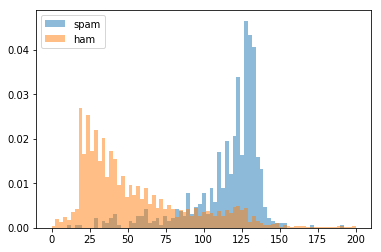

In [145]:
from matplotlib import pyplot 
import numpy as np 

bins = np.linspace(0, 200, 80)

# Histogram of spam 
# norm=true --> To address the variation between spam and ham 

pyplot.hist(data[ data['label'] == 'spam' ]['body_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[ data['label'] == 'ham'  ]['body_len'], bins, alpha=0.5, density=True, label='ham')

pyplot.legend(loc='upper left')

pyplot.show()

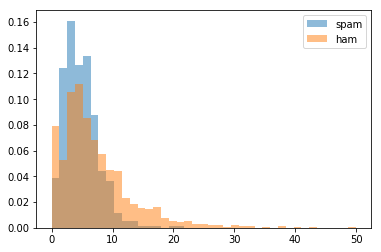

In [146]:
bins = np.linspace(0, 50, 40)

# Histogram of spam 
# norm=true --> To address the variation between spam and ham 

pyplot.hist(data[ data['label'] == 'spam' ]['punct_%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[ data['label'] == 'ham'  ]['punct_%'], bins, alpha=0.5, density=True, label='ham')

pyplot.legend(loc='upper right')

pyplot.show()

## Results
* **Len of SMS message** - We can see a clear disticntion between spam/ham length, which can be helpful for the perdiction.
* **Punct %: The punct_%** - seems to be similiar in spam/ham, hence wouldnt contribute to the perdiction. 


# ML 

### Read in & clean text

In [164]:
# Ensemble learning - Combining multiple models to one metamodel 
# Random forest 

import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text


# TF-IDF vectorization
## --> Each cell is a importance weight ==> How frequent in the text message / How frequent in all text messages

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.DataFrame(X_tfidf.toarray())
X_features.columns = tfidf_vect.get_feature_names()

X_features_add = pd.concat([data['body_len'], data['punct%'], X_features], axis=1)
X_features_add.head()


,body_len,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Cross validation, Kfold**

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score


In [167]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)



array([0.96858169, 0.96947935, 0.9703504 , 0.95867026, 0.96675651])

### **Train/Test fit**

In [168]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [193]:
%%time
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

Wall time: 1.77 s


In [173]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.05087001220697635, 'txt'),
 (0.04492048836235819, 'call'),
 (0.02760686532393636, 'text'),
 (0.027396018283714754, 'win'),
 (0.025838488643765086, 'stop'),
 (0.02479294186487513, 'claim'),
 (0.02169264740017834, '500'),
 (0.018800500300400886, 'mobil'),
 (0.016547548824335918, 'tone'),
 (0.016453263563870658, 'prize')]

In [174]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [175]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.542 / Accuracy: 0.937


### Results
**Percision**  100% of mails identified as spam, were actually spam <br>
**Recall**     54% Of all spam mails were identified <br>
**Accuracy**   93% of all perdictions were true 

In [190]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [191]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.19 / Accuracy: 0.889
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.582 / Accuracy: 0.943
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.739 / Accuracy: 0.964
Est: 10 / Depth: None ---- Precision: 1.0 / Recall: 0.784 / Accuracy: 0.97
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.248 / Accuracy: 0.897
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.562 / Accuracy: 0.94
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.732 / Accuracy: 0.963
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.824 / Accuracy: 0.976
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.248 / Accuracy: 0.897
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.595 / Accuracy: 0.944
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.699 / Accuracy: 0.959
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.83 / Accuracy: 0.977


In [195]:
%%time

rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.83 / Accuracy: 0.977
Wall time: 11.9 s


#### Notice the higher depth and n_estimators 10X the runtime 